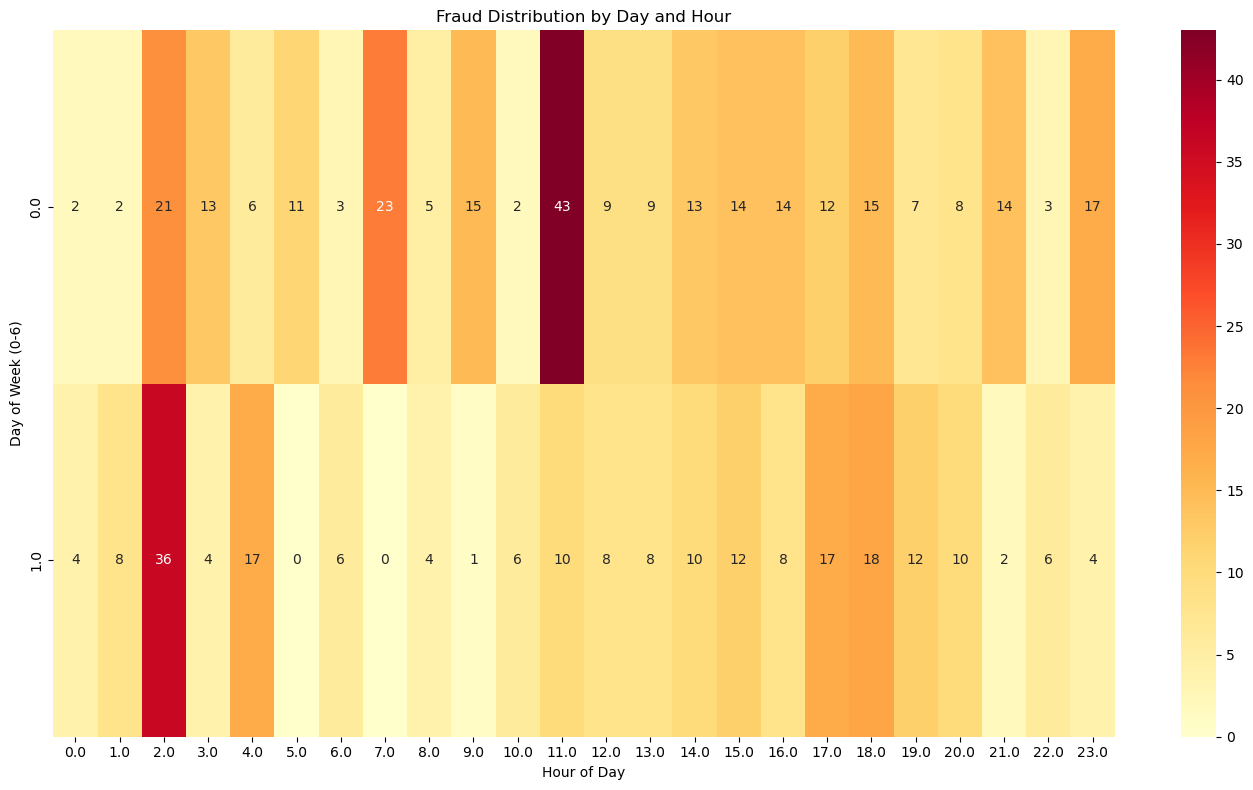

In [6]:
# Heatmap of Fraud Distribution by Hour

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os  # Added for directory creation

# Load the processed data
df = pd.read_csv(r'C:\Users\user\Desktop\fraud_detection_project\data\processed\creditcard_processed.csv')

# Create a dataframe with only fraud transactions
fraud_df = df[df['Class'] == 1].copy()  # Added .copy() to avoid the warning

# Convert Time to Hour of day and Day of week
fraud_df.loc[:, 'Hour'] = fraud_df['Time'].apply(lambda x: (x // 3600) % 24)
fraud_df.loc[:, 'Day'] = fraud_df['Time'].apply(lambda x: (x // 86400) % 7)  # Assuming 7 days cycle

# Create a crosstab for the heatmap
heatmap_data = pd.crosstab(fraud_df['Day'], fraud_df['Hour'])

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Fraud Distribution by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0-6)')
plt.tight_layout()

# Create directories if they don't exist
os.makedirs(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results', exist_ok=True)

# Save the figure
plt.savefig(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results\fraud_heatmap_by_hour.png')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12504\4256231688.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=combined_df['Class'].astype(str), y=combined_df[feature],
C:\Users\user\AppData\Local\Temp\ipykernel_12504\4256231688.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=combined_df['Class'].astype(str), y=combined_df[feature],
C:\Users\user\AppData\Local\Temp\ipykernel_12504\4256231688.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=combined_df['Class'].astype(str), y=combined_df[feature],
C:\Users\user\AppData\Local\

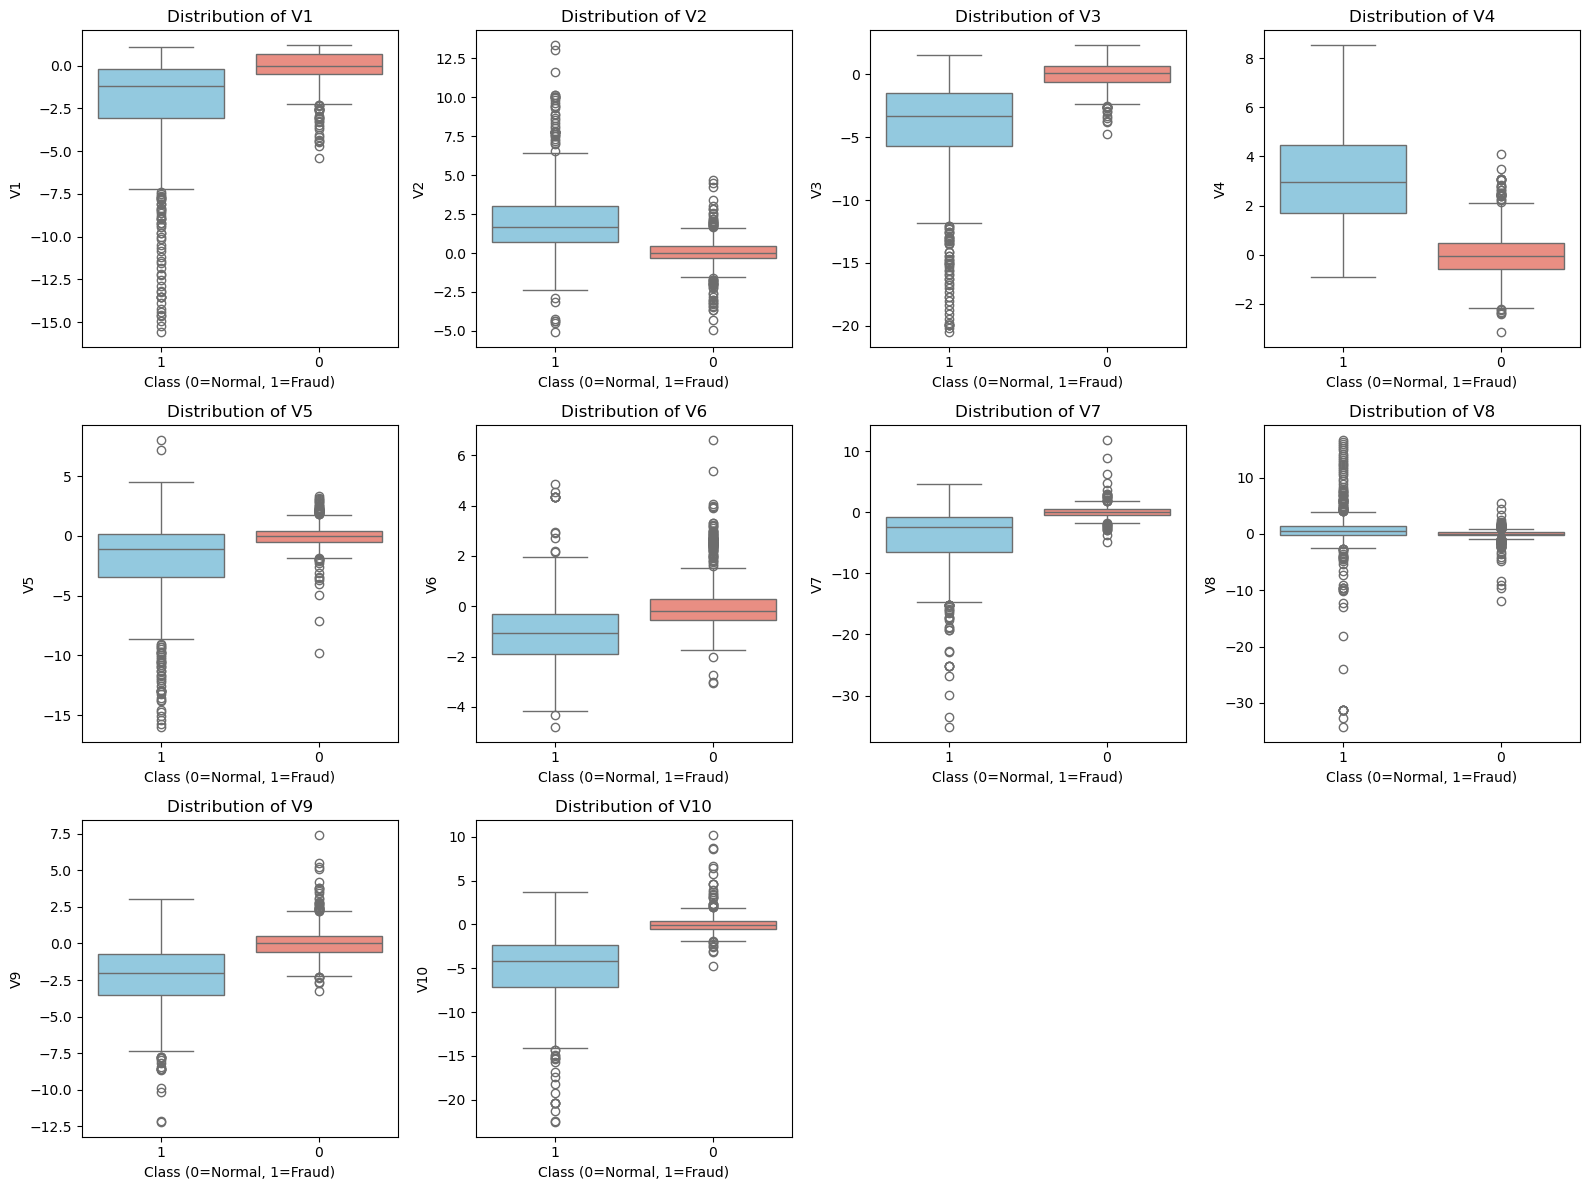

In [10]:
# Comparison of Fraud vs Legitimate Transaction Profiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directory for visualizations
os.makedirs(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results', exist_ok=True)

# Load the processed data
df = pd.read_csv(r'C:\Users\user\Desktop\fraud_detection_project\data\processed\creditcard_processed.csv')

# Separate fraud and legitimate transactions
fraud_df = df[df['Class'] == 1].copy()
legit_df = df[df['Class'] == 0].sample(n=len(fraud_df)*2).copy()

# Select the most important features (V1-V10)
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']

# Create boxplots to compare distributions
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features):
    plt.subplot(3, 4, i+1)
    
    # Create boxplots for both classes - corrected palette with strings
    # Using hue instead of x and palette as a list
    combined_df = pd.concat([fraud_df, legit_df])
    sns.boxplot(x=combined_df['Class'].astype(str), y=combined_df[feature], 
               palette=['skyblue', 'salmon'])
    
    # Add labels
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Class (0=Normal, 1=Fraud)')
    
plt.tight_layout()
plt.savefig(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results\fraud_vs_legit_profiles.png')
plt.show()

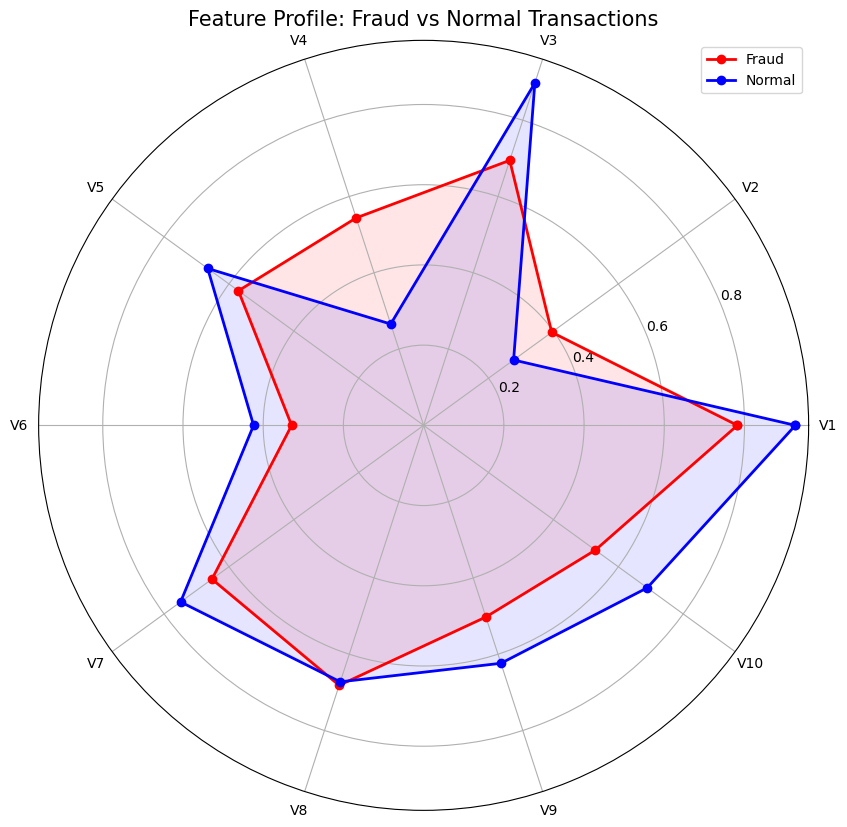

In [12]:
# Create a spider/radar chart for the average values
# Calculate the means
fraud_means = fraud_df[features].mean()
legit_means = legit_df[features].mean()

# Normalize for the radar chart
max_vals = pd.concat([fraud_df, legit_df])[features].max()
min_vals = pd.concat([fraud_df, legit_df])[features].min()
fraud_norm = (fraud_means - min_vals) / (max_vals - min_vals)
legit_norm = (legit_means - min_vals) / (max_vals - min_vals)

# Create the radar chart
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

# Set the angles for each feature
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

# Add the data
fraud_values = fraud_norm.values.tolist()
fraud_values += fraud_values[:1]
legit_values = legit_norm.values.tolist()
legit_values += legit_values[:1]

# Plot the radar chart
ax.plot(angles, fraud_values, 'o-', linewidth=2, label='Fraud', color='red')
ax.plot(angles, legit_values, 'o-', linewidth=2, label='Normal', color='blue')
ax.fill(angles, fraud_values, alpha=0.1, color='red')
ax.fill(angles, legit_values, alpha=0.1, color='blue')

# Add feature labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)

# Add title and legend
plt.title('Feature Profile: Fraud vs Normal Transactions', size=15)
plt.legend(loc='upper right')

plt.savefig(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results\radar_fraud_vs_legit.png')
plt.show()

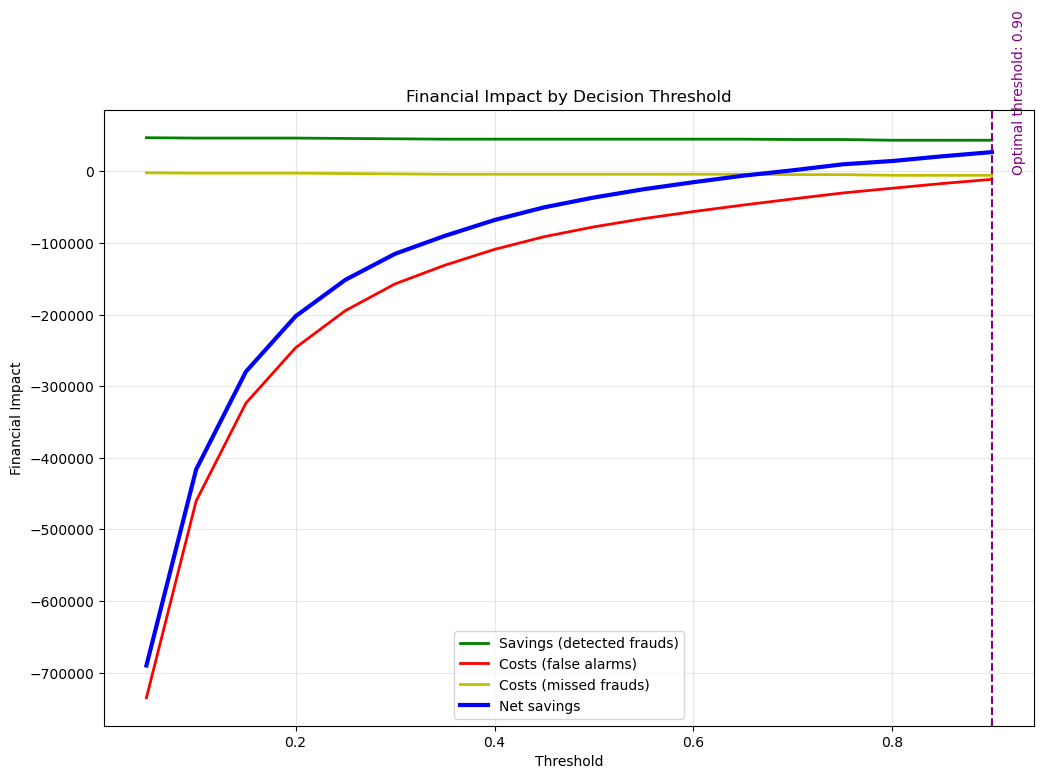

Optimal threshold: 0.90
Maximum net savings: 26900.00


In [14]:
# Financial Impact Graph Based on Different Thresholds

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import os

# Create directory for visualizations
os.makedirs(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results', exist_ok=True)

# Load the model and test data
with open(r'C:\Users\user\Desktop\fraud_detection_project\models\fraud_detection_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load prepared data
with open(r'C:\Users\user\Desktop\fraud_detection_project\data\processed\prepared_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_test, y_test = data['X_test'], data['y_test']

# Get the probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Define cost parameters
avg_fraud_amount = 500  # Average fraud amount in currency
cost_per_false_positive = 50  # Cost to investigate a false alert

# Calculate financial impact for different thresholds
thresholds = np.arange(0.05, 0.95, 0.05)
results = []

for threshold in thresholds:
    # Make predictions with the current threshold
    y_pred = (y_proba >= threshold).astype(int)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate costs and savings
    fraud_savings = tp * avg_fraud_amount  # Money saved by detecting frauds
    false_positive_cost = fp * cost_per_false_positive  # Cost of investigating false alarms
    false_negative_cost = fn * avg_fraud_amount  # Cost of missed frauds
    
    # Calculate net savings
    net_savings = fraud_savings - false_positive_cost - false_negative_cost
    
    # Store results
    results.append({
        'threshold': threshold,
        'fraud_savings': fraud_savings,
        'false_positive_cost': false_positive_cost,
        'false_negative_cost': false_negative_cost,
        'net_savings': net_savings
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot the financial impact
plt.figure(figsize=(12, 8))

plt.plot(results_df['threshold'], results_df['fraud_savings'], 
         'g-', linewidth=2, label='Savings (detected frauds)')
plt.plot(results_df['threshold'], -results_df['false_positive_cost'], 
         'r-', linewidth=2, label='Costs (false alarms)')
plt.plot(results_df['threshold'], -results_df['false_negative_cost'], 
         'y-', linewidth=2, label='Costs (missed frauds)')
plt.plot(results_df['threshold'], results_df['net_savings'], 
         'b-', linewidth=3, label='Net savings')

# Find the optimal threshold
best_idx = results_df['net_savings'].idxmax()
best_threshold = results_df.loc[best_idx, 'threshold']
best_savings = results_df.loc[best_idx, 'net_savings']

# Add a vertical line at the optimal threshold
plt.axvline(x=best_threshold, color='purple', linestyle='--')
plt.text(best_threshold+0.02, 0, f'Optimal threshold: {best_threshold:.2f}', 
         rotation=90, color='purple')

# Add labels and title
plt.xlabel('Threshold')
plt.ylabel('Financial Impact')
plt.title('Financial Impact by Decision Threshold')
plt.grid(alpha=0.3)
plt.legend()

# Save the figure
plt.savefig(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results\financial_impact_by_threshold.png')
plt.show()

print(f"Optimal threshold: {best_threshold:.2f}")
print(f"Maximum net savings: {best_savings:.2f}")

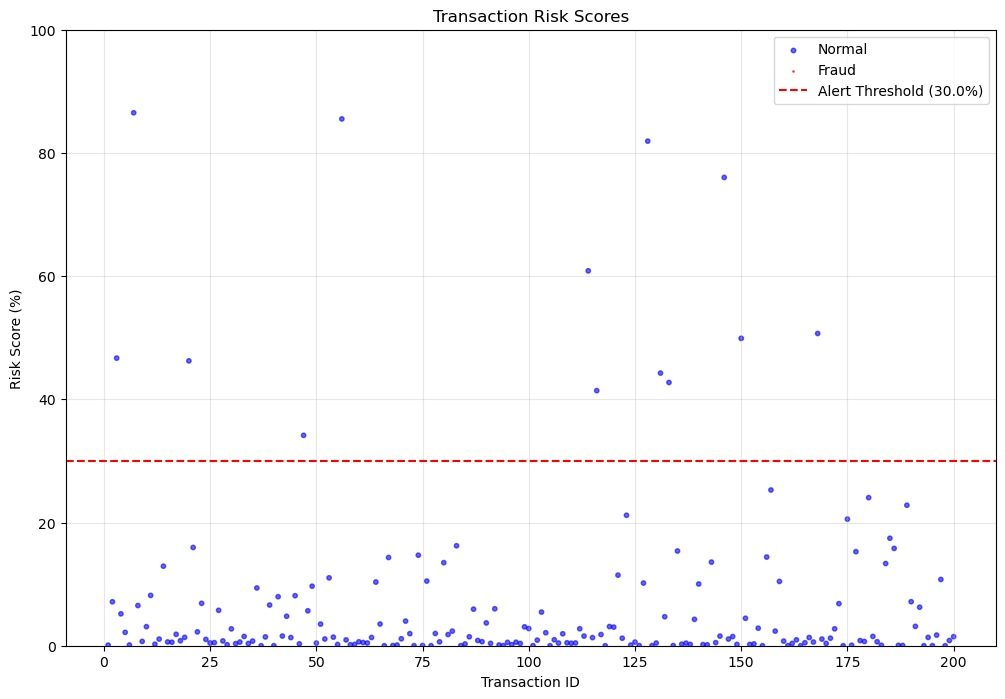

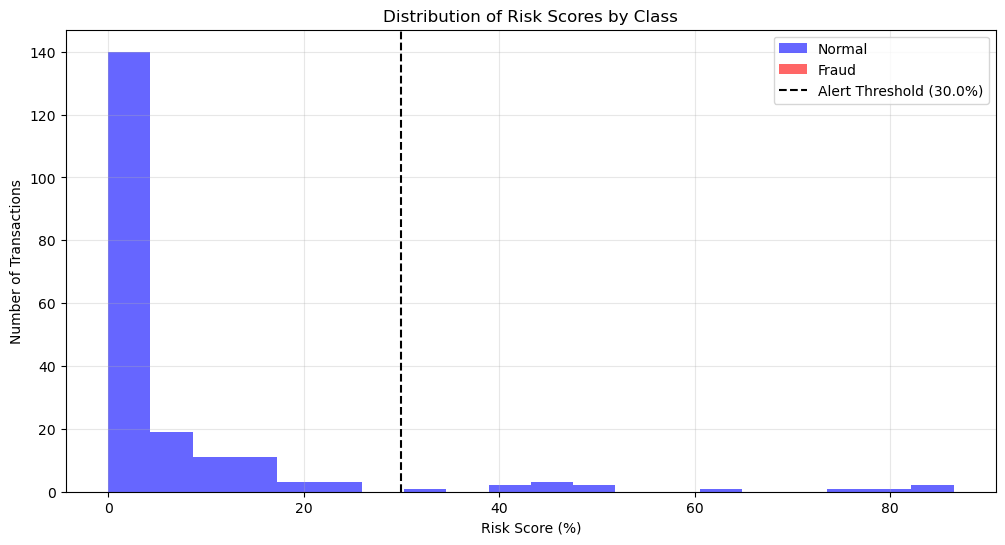

In [18]:
# Risk Scores Dashboard

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import pickle
import os
import matplotlib.pyplot as plt

# Load the model and test data
with open(r'C:\Users\user\Desktop\fraud_detection_project\models\fraud_detection_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load prepared data
with open(r'C:\Users\user\Desktop\fraud_detection_project\data\processed\prepared_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_test, y_test = data['X_test'], data['y_test']

# Get a sample of test data (for better visualization)
np.random.seed(42)  # For reproducibility
sample_indices = np.random.choice(X_test.shape[0], size=200, replace=False)
X_sample = X_test.iloc[sample_indices]
y_sample = y_test.iloc[sample_indices]

# Get the probabilities
y_proba = model.predict_proba(X_sample)[:, 1]

# Create a DataFrame for visualization with ABSOLUTE values for Amount
results_df = pd.DataFrame({
    'Transaction_ID': range(1, len(X_sample) + 1),
    'Amount': np.abs(X_sample['Amount']) if 'Amount' in X_sample.columns else np.abs(np.exp(X_sample['Amount_Log']) - 1),
    'Hour': X_sample['Hour'] if 'Hour' in X_sample.columns else 0,
    'Risk_Score': y_proba * 100,
    'Actual_Class': y_sample
})

# Sort by risk score for better visualization
results_df = results_df.sort_values('Risk_Score', ascending=False)

# Create a static version of scatter plot with matplotlib
plt.figure(figsize=(12, 8))
fraud = results_df[results_df['Actual_Class'] == 1]
normal = results_df[results_df['Actual_Class'] == 0]

# Plot scatter for fraud and normal transactions
plt.scatter(normal['Transaction_ID'], normal['Risk_Score'], 
            s=normal['Amount']/10 + 10, alpha=0.6, color='blue', label='Normal')
plt.scatter(fraud['Transaction_ID'], fraud['Risk_Score'], 
            s=fraud['Amount']/10 + 10, alpha=0.6, color='red', label='Fraud')

# Add threshold line
optimal_threshold = 0.3  # Use your calculated optimal threshold here
plt.axhline(y=optimal_threshold*100, color='red', linestyle='--', 
            label=f'Alert Threshold ({optimal_threshold*100:.1f}%)')

plt.xlabel('Transaction ID')
plt.ylabel('Risk Score (%)')
plt.title('Transaction Risk Scores')
plt.ylim(0, 100)
plt.legend()
plt.grid(alpha=0.3)

plt.show()

# Create a histogram of risk scores by class
plt.figure(figsize=(12, 6))
plt.hist(normal['Risk_Score'], bins=20, alpha=0.6, color='blue', label='Normal')
plt.hist(fraud['Risk_Score'], bins=20, alpha=0.6, color='red', label='Fraud')
plt.axvline(x=optimal_threshold*100, color='black', linestyle='--', 
           label=f'Alert Threshold ({optimal_threshold*100:.1f}%)')
plt.xlabel('Risk Score (%)')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Risk Scores by Class')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

In [28]:
# Create interactive visualization with Plotly

import webbrowser

# Create directory for results
os.makedirs(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results', exist_ok=True)

# Prepare size parameter for scatter plot
size_values = results_df['Amount'] + 10

# Create interactive scatter plot
fig = px.scatter(results_df, 
                x='Transaction_ID', 
                y='Risk_Score',
                color='Actual_Class',
                size=size_values,
                hover_data=['Hour', 'Amount'],
                color_discrete_map={0: 'blue', 1: 'red'},
                labels={'Actual_Class': 'Fraud (1) or Normal (0)'},
                title='Transaction Risk Scores')

# Add threshold line
fig.add_shape(type="line",
             x0=0, y0=optimal_threshold*100, 
             x1=len(results_df), y1=optimal_threshold*100,
             line=dict(color="red", width=2, dash="dash"))

fig.add_annotation(x=len(results_df)/2, 
                  y=optimal_threshold*100 + 5,
                  text=f"Alert Threshold: {optimal_threshold*100:.1f}%",
                  showarrow=False,
                  font=dict(size=12, color="red"))

# Set layout parameters
fig.update_layout(xaxis_title="Transaction ID",
                 yaxis_title="Risk Score (%)",
                 yaxis=dict(range=[0, 100]),
                 height=600)

# Save to HTML and open in browser
html_path = r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results\risk_score_scatter.html'
fig.write_html(html_path)
webbrowser.open('file://' + html_path)

# Create interactive histogram
fig2 = px.histogram(results_df, 
                    x='Risk_Score',
                    color='Actual_Class',
                    nbins=20,
                    opacity=0.7,
                    barmode='overlay',
                    color_discrete_map={0: 'blue', 1: 'red'},
                    labels={'Actual_Class': 'Fraud (1) or Normal (0)'},
                    title='Distribution of Risk Scores by Class')

# Add threshold line
fig2.add_shape(type="line",
              x0=optimal_threshold*100, y0=0, 
              x1=optimal_threshold*100, y1=1,
              yref="paper",
              line=dict(color="black", width=2, dash="dash"))

fig2.add_annotation(x=optimal_threshold*100 + 5, 
                   y=0.9,
                   yref="paper",
                   text=f"Alert Threshold: {optimal_threshold*100:.1f}%",
                   showarrow=False,
                   font=dict(size=12, color="black"))

# Set layout parameters
fig2.update_layout(xaxis_title="Risk Score (%)",
                  yaxis_title="Number of Transactions",
                  height=500)

# Save to HTML and open in browser
html_path2 = r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results\risk_score_histogram.html'
fig2.write_html(html_path2)
webbrowser.open('file://' + html_path2)

print("Interactive visualizations have been saved and opened in your browser!")

Interactive visualizations have been saved and opened in your browser!


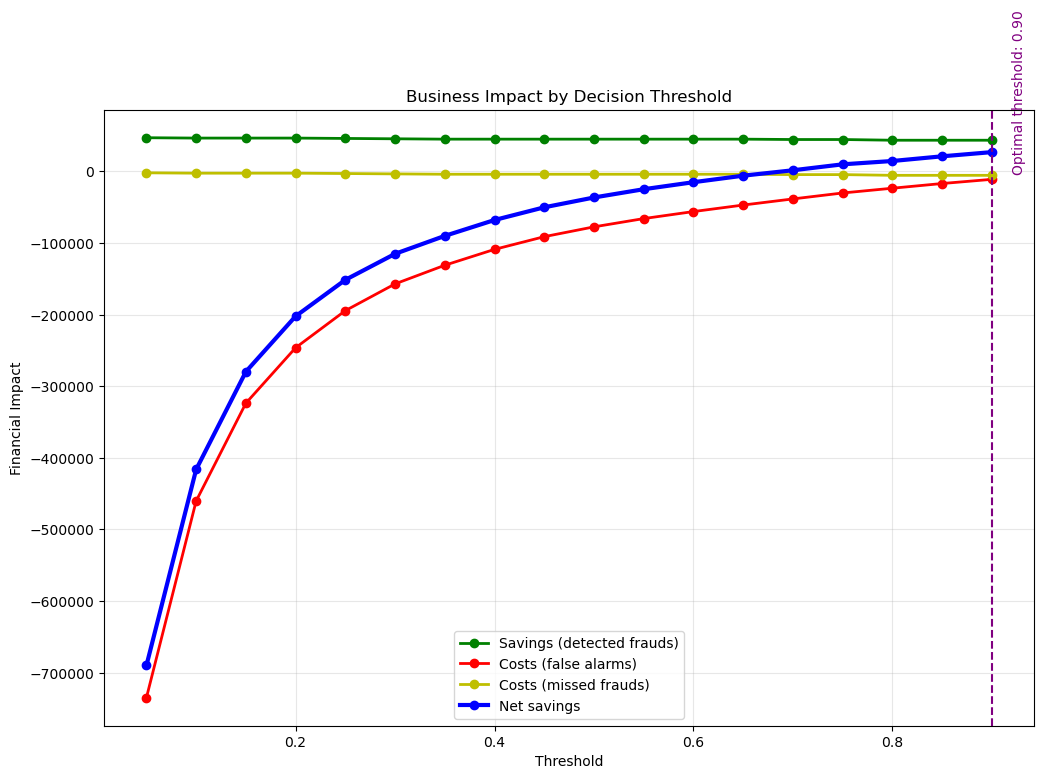

In [30]:
# Business Impact Dashboard

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
import pickle
import os
import matplotlib.pyplot as plt

# Create directory for visualizations
os.makedirs(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results', exist_ok=True)

# Load the model and test data
with open(r'C:\Users\user\Desktop\fraud_detection_project\models\fraud_detection_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load prepared data
with open(r'C:\Users\user\Desktop\fraud_detection_project\data\processed\prepared_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_test, y_test = data['X_test'], data['y_test']

# Get the probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Define cost parameters
avg_fraud_amount = 500  # Average fraud amount in currency
cost_per_false_positive = 50  # Cost to investigate a false alert

# Calculate financial impact for different thresholds
thresholds = np.arange(0.05, 0.95, 0.05)
results = []

for threshold in thresholds:
    # Make predictions with the current threshold
    y_pred = (y_proba >= threshold).astype(int)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate costs and savings
    fraud_savings = tp * avg_fraud_amount  # Money saved by detecting frauds
    false_positive_cost = fp * cost_per_false_positive  # Cost of investigating false alarms
    false_negative_cost = fn * avg_fraud_amount  # Cost of missed frauds
    
    # Calculate net savings
    net_savings = fraud_savings - false_positive_cost - false_negative_cost
    
    # Calculate recall and false positive rate
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    # Store results
    results.append({
        'threshold': threshold,
        'fraud_savings': fraud_savings,
        'false_positive_cost': false_positive_cost,
        'false_negative_cost': false_negative_cost,
        'net_savings': net_savings,
        'recall': recall * 100,  # Convert to percentage
        'false_positive_rate': fpr * 100,  # Convert to percentage
        'true_positives': tp,
        'false_positives': fp,
        'false_negatives': fn,
        'true_negatives': tn
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Find the optimal threshold
best_idx = results_df['net_savings'].idxmax()
best_threshold = results_df.loc[best_idx, 'threshold']

# Create an interactive dashboard for business impact with Plotly
fig = go.Figure()

# Add traces for financial metrics
fig.add_trace(go.Scatter(
    x=results_df['threshold'],
    y=results_df['fraud_savings'],
    mode='lines+markers',
    name='Savings (detected frauds)',
    line=dict(color='green', width=2)
))

fig.add_trace(go.Scatter(
    x=results_df['threshold'],
    y=-results_df['false_positive_cost'],
    mode='lines+markers',
    name='Costs (false alarms)',
    line=dict(color='red', width=2)
))

fig.add_trace(go.Scatter(
    x=results_df['threshold'],
    y=-results_df['false_negative_cost'],
    mode='lines+markers',
    name='Costs (missed frauds)',
    line=dict(color='orange', width=2)
))

fig.add_trace(go.Scatter(
    x=results_df['threshold'],
    y=results_df['net_savings'],
    mode='lines+markers',
    name='Net savings',
    line=dict(color='blue', width=3)
))

# Add vertical line at optimal threshold
fig.add_shape(
    type='line',
    x0=best_threshold, y0=results_df['net_savings'].min(), 
    x1=best_threshold, y1=results_df['net_savings'].max(),
    line=dict(color='purple', width=2, dash='dash')
)

fig.add_annotation(
    x=best_threshold,
    y=results_df.loc[best_idx, 'net_savings'],
    text=f"Optimal threshold: {best_threshold:.2f}",
    showarrow=True,
    arrowhead=1
)

# Update layout
fig.update_layout(
    title='Business Impact by Decision Threshold',
    xaxis_title='Threshold',
    yaxis_title='Financial Impact',
    height=600,
    hovermode='x unified'
)

# Save as HTML file
fig.write_html(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results\business_impact_dashboard.html')

# Create a static version with matplotlib
plt.figure(figsize=(12, 8))

plt.plot(results_df['threshold'], results_df['fraud_savings'], 
         'g-o', linewidth=2, label='Savings (detected frauds)')
plt.plot(results_df['threshold'], -results_df['false_positive_cost'], 
         'r-o', linewidth=2, label='Costs (false alarms)')
plt.plot(results_df['threshold'], -results_df['false_negative_cost'], 
         'y-o', linewidth=2, label='Costs (missed frauds)')
plt.plot(results_df['threshold'], results_df['net_savings'], 
         'b-o', linewidth=3, label='Net savings')

# Add vertical line at optimal threshold
plt.axvline(x=best_threshold, color='purple', linestyle='--')
plt.text(best_threshold+0.02, 0, f'Optimal threshold: {best_threshold:.2f}', 
         rotation=90, color='purple')

plt.xlabel('Threshold')
plt.ylabel('Financial Impact')
plt.title('Business Impact by Decision Threshold')
plt.grid(alpha=0.3)
plt.legend()

# Save static version
plt.savefig(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results\business_impact_dashboard_static.png')
plt.show()

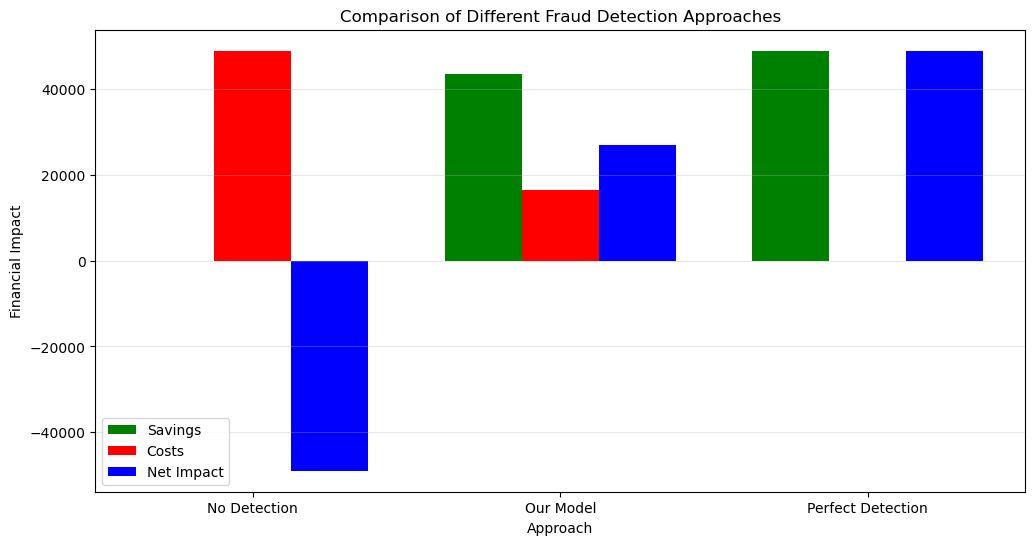

In [32]:
# Create a comparison of different approaches
# Create data for the comparison
approaches = ['No Detection', 'Our Model', 'Perfect Detection']

# Calculate metrics for no detection
no_detection = {
    'Savings': 0,
    'Costs': results_df.loc[best_idx, 'false_negative_cost'] + results_df.loc[best_idx, 'true_positives'] * avg_fraud_amount,
    'Net': -(results_df.loc[best_idx, 'false_negative_cost'] + results_df.loc[best_idx, 'true_positives'] * avg_fraud_amount)
}

# Metrics for our model at optimal threshold
our_model = {
    'Savings': results_df.loc[best_idx, 'fraud_savings'],
    'Costs': results_df.loc[best_idx, 'false_positive_cost'] + results_df.loc[best_idx, 'false_negative_cost'],
    'Net': results_df.loc[best_idx, 'net_savings']
}

# Metrics for perfect detection (theoretical)
fraud_count = results_df.loc[best_idx, 'true_positives'] + results_df.loc[best_idx, 'false_negatives']
perfect_detection = {
    'Savings': fraud_count * avg_fraud_amount,
    'Costs': 0,
    'Net': fraud_count * avg_fraud_amount
}

# Create a comparison DataFrame
comparison_df = pd.DataFrame([no_detection, our_model, perfect_detection], index=approaches)
comparison_df = comparison_df.reset_index().rename(columns={'index': 'Approach'})

# Create a grouped bar chart with Plotly
fig2 = px.bar(
    comparison_df,
    x='Approach',
    y=['Savings', 'Costs', 'Net'],
    barmode='group',
    title='Comparison of Different Fraud Detection Approaches',
    color_discrete_map={'Savings': 'green', 'Costs': 'red', 'Net': 'blue'},
    height=500
)

fig2.update_layout(
    xaxis_title='Approach',
    yaxis_title='Financial Impact',
    legend_title='Metric'
)

fig2.write_html(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results\approach_comparison_dashboard.html')

# Create a static version of comparison chart
plt.figure(figsize=(12, 6))
x = np.arange(len(approaches))
width = 0.25

plt.bar(x - width, comparison_df['Savings'], width, label='Savings', color='green')
plt.bar(x, comparison_df['Costs'], width, label='Costs', color='red')
plt.bar(x + width, comparison_df['Net'], width, label='Net Impact', color='blue')

plt.xlabel('Approach')
plt.ylabel('Financial Impact')
plt.title('Comparison of Different Fraud Detection Approaches')
plt.xticks(x, approaches)
plt.legend()
plt.grid(alpha=0.3, axis='y')

# Save static version
plt.savefig(r'C:\Users\user\Desktop\fraud_detection_project\visualizations\results\approach_comparison_static.png')
plt.show()